In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 17.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [336]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 19.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 9.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/Users/ashutoshpatil/Downloads/Titanic-Dataset.csv')

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Cabin has 687 null values out of 891 i.e. 77% so dropping cabin col

df = df.drop(columns = ['Cabin'])

In [13]:
df.groupby('Sex')['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [14]:
# Replacing 177 null values with median of age

df['Age'] = df['Age'].fillna(value = 28)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [16]:
# removing 2 rows of embarked with null values

df = df.dropna(subset = ['Embarked'])

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
# Overall survival percentage

survived_perctenage = df[df['Survived'] == 1].shape[0] / df['Survived'].shape[0] * 100
print(f'''Survived : {round(survived_perctenage ,2)}%''')
died_percentage = 100 - survived_perctenage
print(f'Died : {round(died_percentage,2)}%')

Survived : 38.25%
Died : 61.75%


In [19]:
# Survival rate by gender

male_survivors_rate = df[(df['Survived'] == 1) & (df['Sex'] == 'male')].shape[0] / df[(df['Sex'] == 'male')].shape[0] * 100

female_survivors_rate = df[(df['Survived'] == 1) & (df['Sex'] == 'female')].shape[0] / df[(df['Sex'] == 'female')].shape[0] * 100

print(f'Male survival rate: {round(male_survivors_rate,2)}%')
print(f'Female survival rate: {round(female_survivors_rate,2)}%')

Male survival rate: 18.89%
Female survival rate: 74.04%


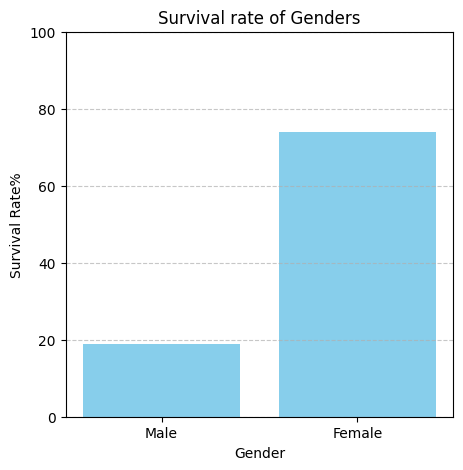

In [20]:
# Plotting bar graph to survival rate by gender

Genders = ['Male','Female']
surival_rates = [male_survivors_rate,female_survivors_rate]

plt.figure(figsize = (5,5))
plt.bar(Genders, surival_rates, color = 'skyblue')
plt.xlabel('Gender')
plt.ylabel('Survival Rate%')
plt.title('Survival rate of Genders')
plt.ylim(0,100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
# Creating age ranges to observe survival rate by age categories 

df['Age'] = np.ceil(df['Age']).astype(int)
bins = [0,2,13,20,40,65,80]
df['Age_Category'] = pd.cut(df['Age'],bins,labels = ["Infant","Chilldren","Teenager","Adult","Middle_Age","Senior"])

In [22]:
# Surviaval rate by Age group

infants_survival_rate = df[(df['Age_Category'] == 'Infant') & (df['Survived'] == 1)].shape[0] / df[df['Age_Category'] == 'Infant'].shape[0] * 100

children_survival_rate = df[(df['Age_Category'] == 'Chilldren') & (df['Survived'] == 1)].shape[0] / df[df['Age_Category'] == 'Chilldren'].shape[0] * 100

teenagers_survival_rate = df[(df['Age_Category'] == 'Teenager') & (df['Survived'] == 1)].shape[0] / df[df['Age_Category'] == 'Teenager'].shape[0] * 100

adults_survival_rate = df[(df['Age_Category'] == 'Adult') & (df['Survived'] == 1)].shape[0] / df[df['Age_Category'] == 'Adult'].shape[0] * 100

middle_aged_survival_rate = df[(df['Age_Category'] == 'Middle_Age') & (df['Survived'] == 1)].shape[0] / df[df['Age_Category'] == 'Middle_Age'].shape[0] * 100

seniors_survival_rate = df[(df['Age_Category'] == 'Senior') & (df['Survived'] == 1)].shape[0] / df[df['Age_Category'] == 'Senior'].shape[0] * 100

print(f'''Infant's survival rate : {round(infants_survival_rate,2)}%
Children's survival rate : {round(children_survival_rate,2)}%
Teenager's survival rate : {round(teenagers_survival_rate,2)}%
Adult's survival rate : {round(adults_survival_rate,2)}%
Middle aged survival rate : {round(middle_aged_survival_rate,2)}%
Senior's survival rate : {round(seniors_survival_rate,2)}%''')

Infant's survival rate : 62.5%
Children's survival rate : 57.45%
Teenager's survival rate : 37.04%
Adult's survival rate : 36.36%
Middle aged survival rate : 37.59%
Senior's survival rate : 12.5%


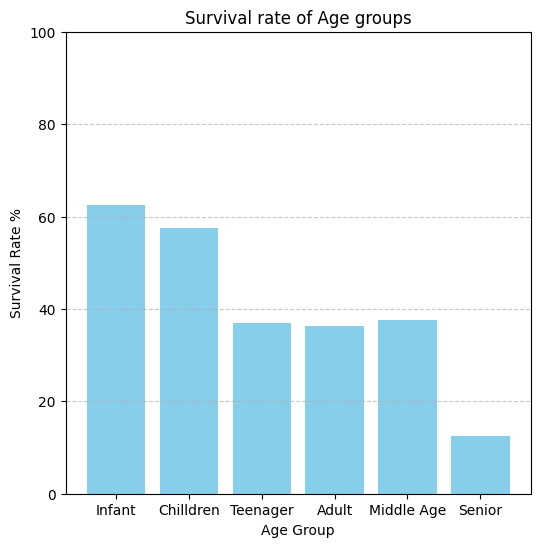

In [23]:
# Plotting barchart for above survival rate

categories = ["Infant","Chilldren","Teenager","Adult","Middle Age","Senior"]
survival_rates = [infants_survival_rate,children_survival_rate,teenagers_survival_rate,adults_survival_rate,middle_aged_survival_rate,seniors_survival_rate]

plt.figure(figsize = (6,6))
plt.bar(categories, survival_rates, color = 'skyblue')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate %')
plt.title('Survival rate of Age groups')
plt.ylim(0,100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [24]:
# Lets see distribution of survivors by Gender

total_survivors = df[df['Survived'] == 1]
total_survivors_count = total_survivors.shape[0]
male_survivors = total_survivors[total_survivors['Sex'] == 'male']
male_survivors_count = male_survivors.shape[0]
female_survivors = total_survivors[total_survivors['Sex'] == 'female']
female_survivors_count = female_survivors.shape[0]
print(f'Out of {total_survivors_count} Total survivors, {male_survivors_count} are male and {female_survivors_count} are female')

Out of 340 Total survivors, 109 are male and 231 are female


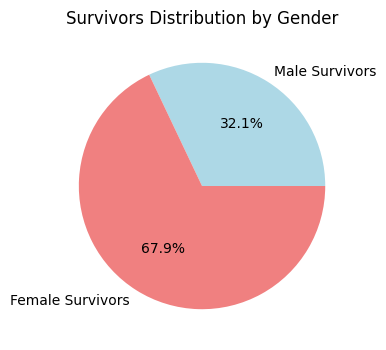

In [25]:
# Plotting a pie chart to see survivors distribution by gender

labels = ['Male Survivors','Female Survivors']
sizes = [male_survivors_count,female_survivors_count]
colors = ['lightblue','lightcoral']

plt.figure(figsize = (4,4))
plt.pie(sizes, labels = labels, autopct='%1.1f%%', colors = colors)
plt.title('Survivors Distribution by Gender')
plt.show()

In [26]:
# Lets see distribution of survivors by Age Group

infant_survivor = total_survivors[total_survivors['Age_Category'] == 'Infant']
infant_survivor_count = infant_survivor.shape[0]

children_survivor = total_survivors[total_survivors['Age_Category'] == 'Chilldren']
children_survivor_count = children_survivor.shape[0]

teenager_survivor = total_survivors[total_survivors['Age_Category'] == 'Teenager']
teenager_survivor_count = teenager_survivor.shape[0]

adult_survivor = total_survivors[total_survivors['Age_Category'] == 'Adult']
adult_survivor_count = adult_survivor.shape[0]

middle_age_survivor = total_survivors[total_survivors['Age_Category'] == 'Middle_Age']
middle_age_survivor_count = middle_age_survivor.shape[0]

senior_survivor = total_survivors[total_survivors['Age_Category'] == 'Senior']
senior_survivor_count = senior_survivor.shape[0]

print(f'Out of {total_survivors_count} total survivors {infant_survivor_count} are infants, {children_survivor_count} are children, {teenager_survivor_count} are teenagers, {adult_survivor_count} are adults, {middle_age_survivor_count} are middle aged and {senior_survivor_count} is senior')



Out of 340 total survivors 15 are infants, 27 are children, 40 are teenagers, 204 are adults, 53 are middle aged and 1 is senior


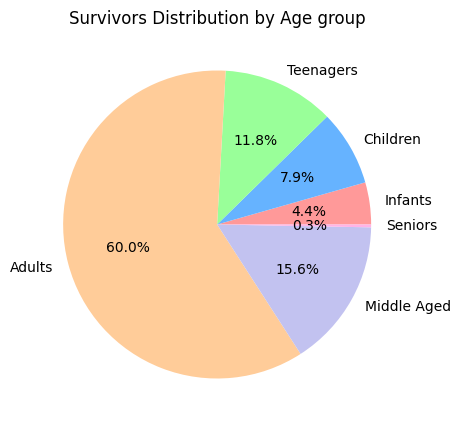

In [27]:
# Plotting another pie chart to

labels = ['Infants','Children','Teenagers','Adults','Middle Aged','Seniors']
sizes = [infant_survivor_count,children_survivor_count,teenager_survivor_count,adult_survivor_count,middle_age_survivor_count,senior_survivor_count]
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0', '#FFB3E6']

plt.figure(figsize = (5,5))
plt.pie(sizes, labels = labels, colors = colors, autopct='%1.1f%%')
plt.title('Survivors Distribution by Age group')
plt.show()

In [28]:
# Lets see distribution of survivors by boarding location
# C = Cherbourg, Q = Queenstown, S = Southampton

cherbourg_survivors = total_survivors[total_survivors['Embarked'] == 'C']
cherbourg_survivors_count = cherbourg_survivors.shape[0]

queenstown_survivors = total_survivors[total_survivors['Embarked'] == 'Q']
queenstown_survivors_count = queenstown_survivors.shape[0]

southampton_survivors = total_survivors[total_survivors['Embarked'] == 'S']
southampton_survivors_count = southampton_survivors.shape[0]

print(f'Out of {total_survivors_count} total survivors {cherbourg_survivors_count} were from Cherbourg, {queenstown_survivors_count} were from Queenstown and {southampton_survivors_count} were from Southampton')      


Out of 340 total survivors 93 were from Cherbourg, 30 were from Queenstown and 217 were from Southampton


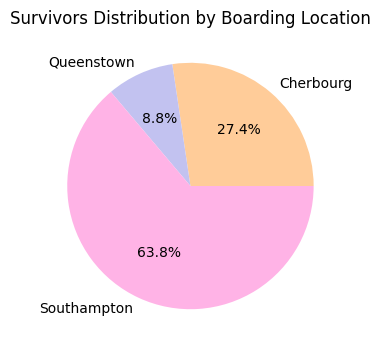

In [29]:
# Plotting another pie chart 

labels = ['Cherbourg','Queenstown','Southampton']
sizes = [cherbourg_survivors_count,queenstown_survivors_count,southampton_survivors_count]
colors = ['#FFCC99', '#C2C2F0', '#FFB3E6']

plt.figure(figsize = (4,4))
plt.pie(sizes, labels = labels, colors = colors, autopct='%1.1f%%')
plt.title('Survivors Distribution by Boarding Location')
plt.show()

In [31]:
# Survival rate by class

more_than_two_sibsp = df[(df['SibSp'] > 2)].shape[0]
less_than_two_sibsp = df[(df['SibSp'] <= 2)].shape[0]
more_than_two_sibsp_perc = df[(df['SibSp'] > 2) & (df['Survived'] == 1)].shape[0] / more_than_two_sibsp * 100 
less_than_two_sibsp_perc = df[(df['SibSp'] <= 2) & (df['Survived'] == 1)].shape[0] / less_than_two_sibsp * 100 
print(f'''Survival rate of people traveling with more than 2 Sibsp is {round(more_than_two_sibsp_perc,2)}% 
and of people travelling with less than 2 Sibsp is {round(less_than_two_sibsp_perc,2)}%
Therefore  {round(less_than_two_sibsp_perc,2) - round(more_than_two_sibsp_perc,2)}% chances dropped when travelling with 2 or more Sibsp''')

Survival rate of people traveling with more than 2 Sibsp is 15.22% 
and of people travelling with less than 2 Sibsp is 39.5%
Therefore  24.28% chances dropped when travelling with 2 or more Sibsp


In [33]:
# Average fare of survived vs not survived

survived_mean_fare = df[(df['Survived'] == 1)]['Fare'].mean()
not_survived_mean_fare = df[(df['Survived'] == 0)]['Fare'].mean()
print(f'''Average fare of people who survived : {round(survived_mean_fare,2)}
Average fare of people who did not survived : {round(not_survived_mean_fare,2)}''')

Average fare of people who survived : 48.21
Average fare of people who did not survived : 22.12
